In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore", message="n_quantiles .* is greater than the total number of samples.*")

In [3]:
data = pd.read_csv('customers_dataset.csv')

In [4]:
data.columns = ['custid', 'gender', 'age', 'annual_income', 'spending_score']

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   custid          200 non-null    int64 
 1   gender          200 non-null    object
 2   age             200 non-null    int64 
 3   annual_income   200 non-null    int64 
 4   spending_score  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [6]:
data.tail()

,custid,gender,age,annual_income,spending_score
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18
199,200,Male,30,137,83


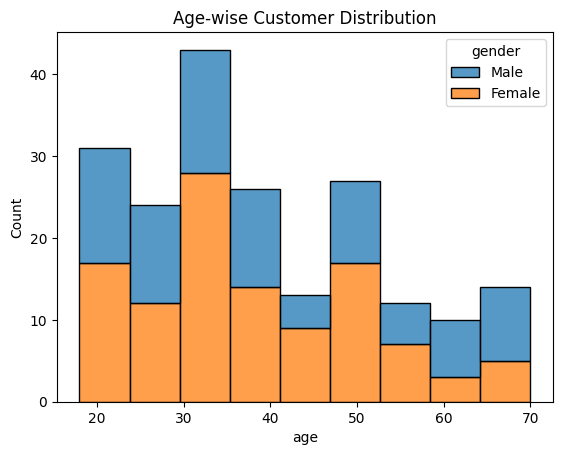

In [7]:
sns.histplot(data=data, x='age', hue='gender', multiple = 'stack')
plt.title("Age-wise Customer Distribution")
plt.show()

<Axes: xlabel='age'>

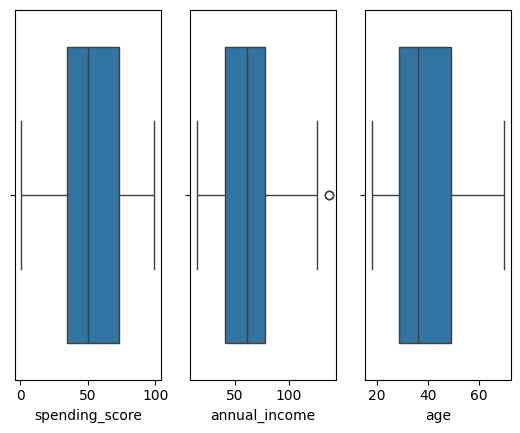

In [8]:
plt.subplot(1,3,1)
sns.boxplot(data=data, x='spending_score')
plt.subplot(1,3,2)
sns.boxplot(data=data, x='annual_income')
plt.subplot(1,3,3)
sns.boxplot(data=data, x='age')

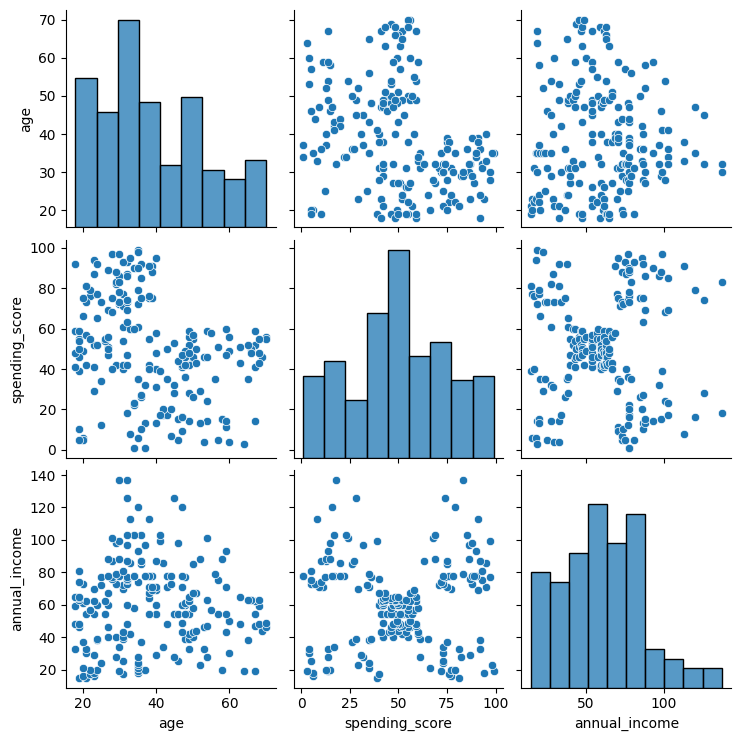

In [9]:
numerical_col = ['age', 'spending_score', 'annual_income']
sns.pairplot(data[numerical_col])

1. all the 3 numerical columns are skewed from normal distribution, age and annual income being left skewed...
2. Clear clusters visible for spending vs annual income scatterplot

In [10]:
data.head()

,custid,gender,age,annual_income,spending_score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [11]:
num_cols = data.select_dtypes("int")

In [12]:
num_cols

,custid,age,annual_income,spending_score
0,1,19,15,39
1,2,21,15,81
2,3,20,16,6
3,4,23,16,77
4,5,31,17,40
...,...,...,...,...
195,196,35,120,79
196,197,45,126,28
197,198,32,126,74
198,199,32,137,18


In [13]:
num_cols.skew()

,0
custid,0.000000
age,0.485569
annual_income,0.321843
spending_score,-0.047220


**graphs with skewness between -0.5 to 0.5 are considered almost symmetrical...**

In [14]:
log_transform = lambda x : np.log1p(x)

data['age_log'] = data['age'].apply(log_transform)

<Axes: xlabel='age_log', ylabel='Count'>

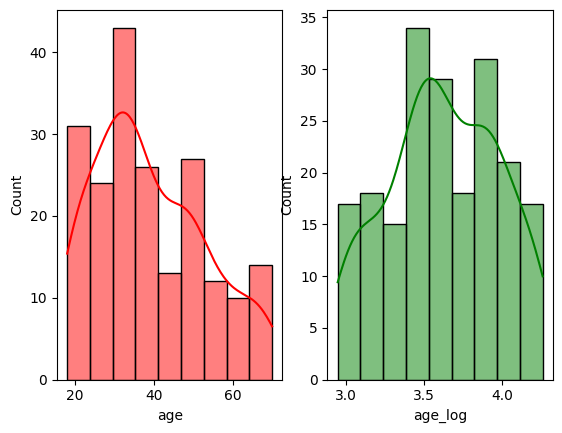

In [15]:
plt.subplot(1,2,1)
sns.histplot(data.age, kde = True, color = 'red')
plt.subplot(1,2,2)
sns.histplot(data.age_log, kde = True, color = 'green')

In [16]:
sqrt_transform = lambda x: np.sqrt(x)
data['annual_income_sqrt'] = data.annual_income.apply(sqrt_transform)
print(f"Old skewness in Annual Income: {data.annual_income.skew()}")
print(f"New skewness in Annual Income: {data.annual_income_sqrt.skew()}")

Old skewness in Annual Income: 0.3218425498619055
New skewness in Annual Income: -0.23028952579486217


<Axes: xlabel='annual_income_sqrt', ylabel='Count'>

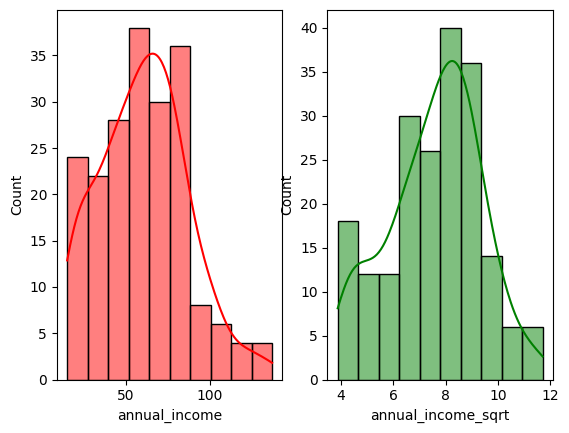

In [17]:
plt.subplot(1,2,1)
sns.histplot(data.annual_income, kde = True, color = 'red')
plt.subplot(1,2,2)
sns.histplot(data.annual_income_sqrt, kde = True, color = 'green')

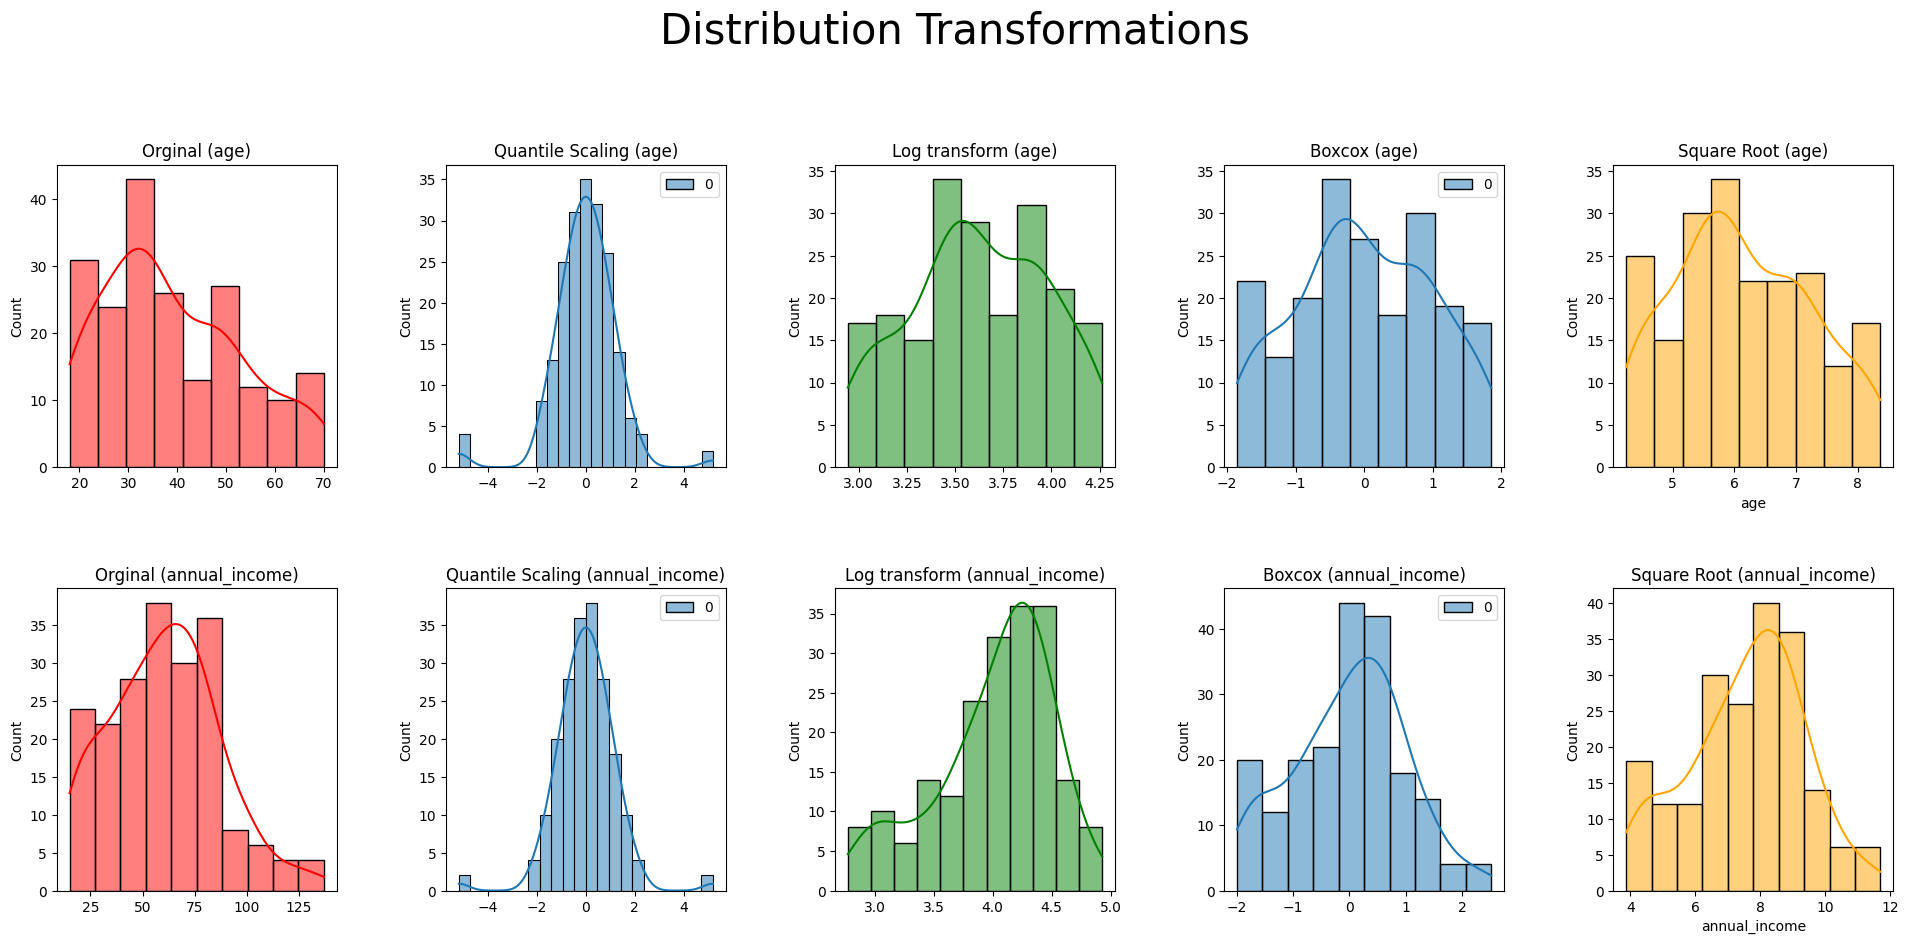

In [18]:
from sklearn.preprocessing import QuantileTransformer, PowerTransformer

fig,axes = plt.subplots(ncols=5, nrows=2, figsize = (20,10))

non_dist_cols = ['age', 'annual_income']
for index,column in enumerate(non_dist_cols):

    scaler1 = QuantileTransformer(output_distribution="normal")
    quant_df = scaler1.fit_transform(data[[column]])

    scaler2 = PowerTransformer(method='box-cox')
    boxcox_df = scaler2.fit_transform(data[[column]])

    sns.histplot(x= data[column], ax=axes[index,0], color ='r', kde=True)
    sns.histplot(quant_df, ax=axes[index,1], color='blue', kde=True)
    sns.histplot(np.log1p(data[column]), ax=axes[index,2], color='green', kde=True)
    sns.histplot(boxcox_df, ax=axes[index,3], kde=True)
    sns.histplot(np.sqrt(data[column]), ax=axes[index,4], color='orange', kde=True)


    axes[index,0].set_title(f"Orginal ({column})")
    axes[index,0].set(xlabel=None)
    axes[index,1].set_title(f"Quantile Scaling ({column})")
    axes[index,2].set_title(f"Log transform ({column})")
    axes[index,2].set(xlabel=None)
    axes[index,3].set_title(f"Boxcox ({column})")
    axes[index,4].set_title(f"Square Root ({column})")

plt.suptitle("Distribution Transformations",fontsize = 30)
plt.tight_layout(pad = 4)
plt.show()

In [19]:
data.tail()

,custid,gender,age,annual_income,spending_score,age_log,annual_income_sqrt
195,196,Female,35,120,79,3.583519,10.954451
196,197,Female,45,126,28,3.828641,11.224972
197,198,Male,32,126,74,3.496508,11.224972
198,199,Male,32,137,18,3.496508,11.704700
199,200,Male,30,137,83,3.433987,11.704700


In [20]:
float(quant_df.mean())

0.00020072986819215542

In [21]:
# prompt: i want to create a table, where the heading are 'original', quantile boxcox etc. and the index has skewness, mean, std dev

data_age_quant = scaler1.fit_transform(data[['age']])
data_age_boxcox = scaler2.fit_transform(data[['age']])
data_annual_income_quant = scaler1.fit_transform(data[['annual_income']])
data_annual_income_boxcox = scaler2.fit_transform(data[['annual_income']])

age_skewness = [data.age.skew(), pd.Series(data_age_quant.flatten()).skew(), np.log1p(data.age).skew(), pd.Series(data_age_boxcox.flatten()).skew(), np.sqrt(data.age).skew()]
age_mean = [data.age.mean(), pd.Series(data_age_quant.flatten()).mean(), np.log1p(data.age).mean(), pd.Series(data_age_boxcox.flatten()).mean(), np.sqrt(data.age).mean()]
age_std = [data.age.std(), pd.Series(data_age_quant.flatten()).std(), np.log1p(data.age).std(), pd.Series(data_age_boxcox.flatten()).std(), np.sqrt(data.age).std()]

annual_income_skewness = [data.annual_income.skew(), pd.Series(data_annual_income_quant.flatten()).skew(), np.log1p(data.annual_income).skew(), pd.Series(data_annual_income_boxcox.flatten()).skew(), np.sqrt(data.annual_income).skew()]
annual_income_mean = [data.annual_income.mean(), pd.Series(data_annual_income_quant.flatten()).mean(), np.log1p(data.annual_income).mean(), pd.Series(data_annual_income_boxcox.flatten()).mean(), np.sqrt(data.annual_income).mean()]
annual_income_std = [data.annual_income.std(), pd.Series(data_annual_income_quant.flatten()).std(), np.log1p(data.annual_income).std(), pd.Series(data_annual_income_boxcox.flatten()).std(), np.sqrt(data.annual_income).std()]
index = ['original', 'quantile', 'log', 'boxcox', 'sqrt']
age_table = pd.DataFrame({
    'skewness': age_skewness,
    'mean': age_mean,
    'std dev': age_std
}, index=index)

annual_income_table = pd.DataFrame({
    'skewness': annual_income_skewness,
    'mean': annual_income_mean,
    'std dev': annual_income_std
}, index=index)

pd.set_option('display.float_format', '{:.4f}'.format)

print("Age Transformation Statistics")
print(age_table)
print("\nAnnual Income Transformation Statistics")
print(annual_income_table)

Age Transformation Statistics
          skewness    mean  std dev
original    0.4856 38.8500  13.9690
quantile   -0.5516 -0.0293   1.2804
log        -0.0895  3.6231   0.3566
boxcox     -0.0165  0.0000   1.0025
sqrt        0.1951  6.1331   1.1144

Annual Income Transformation Statistics
          skewness    mean  std dev
original    0.3218 60.5600  26.2647
quantile   -0.0008  0.0002   1.1929
log        -0.7360  4.0124   0.4951
boxcox     -0.0664 -0.0000   1.0025
sqrt       -0.2303  7.5812   1.7608


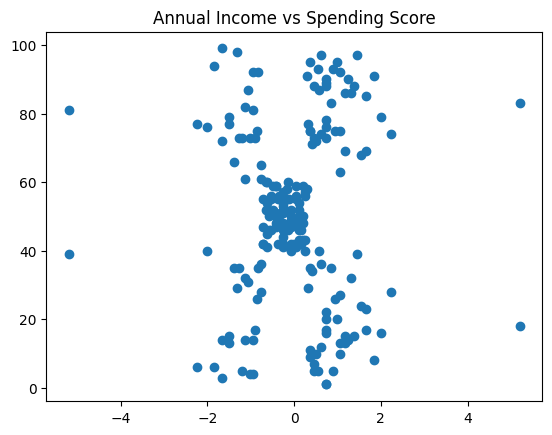

In [22]:
plt.scatter(x = data_annual_income_quant, y = data['spending_score'])
plt.title("Annual Income vs Spending Score")
plt.show()

# CLUSTERING

In [23]:
# starting with

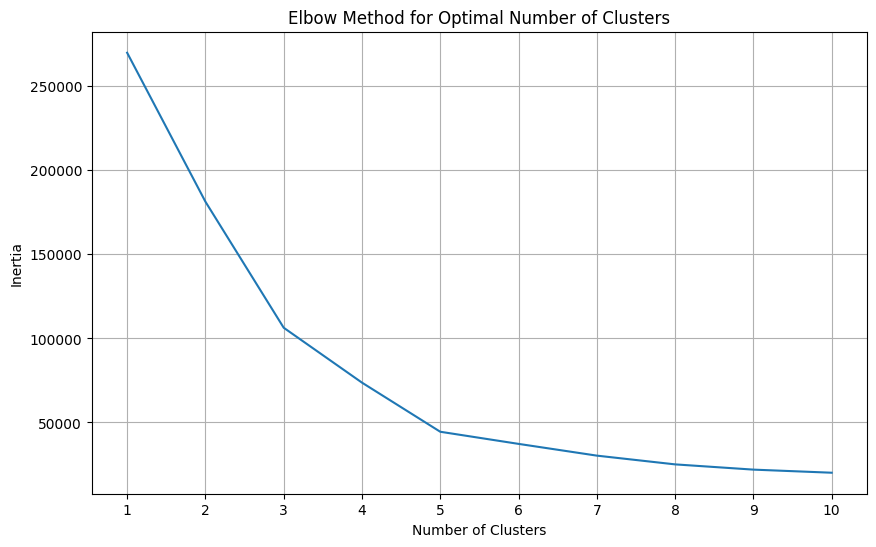

In [24]:
# prompt: apply elbow method for clusters in data for annual_icnome and spending_score

from sklearn.cluster import KMeans

# Prepare the data for clustering
X = data[['annual_income', 'spending_score']]

# Apply the elbow method
inertia = []
for n_clusters in range(1, 11):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

# Plot the elbow method graph
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), inertia)
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.xticks(range(1, 11))
plt.grid(True)
plt.show()


I can clearly see 5 clusters, and theres an elbow at n=5...

In [25]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=5, random_state=0)

kmeans.fit(X)

KMeans(n_clusters=5, random_state=0)

In [26]:
kmeans.cluster_centers_

array([[55.2962963 , 49.51851852],
       [86.53846154, 82.12820513],
       [88.2       , 17.11428571],
       [26.30434783, 20.91304348],
       [25.72727273, 79.36363636]])

<ipython-input-71-9b21180db04c>:18: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(cluster_data['annual_income'], cluster_data['spending_score'], label=custom_labels[i], cmap = colors)


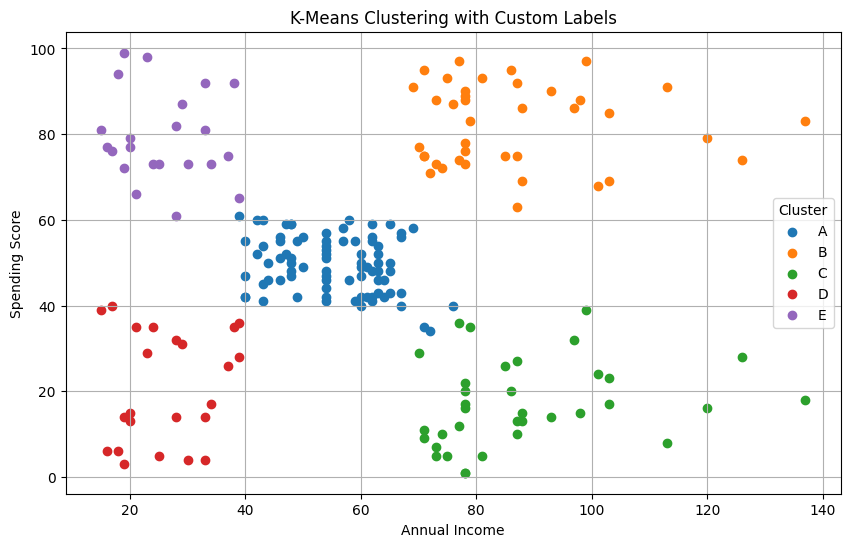

In [71]:
# Define the number of clusters
n_clusters = 5
colors = ['red', 'blue', 'green', 'orange', 'purple']


X = data[['annual_income', 'spending_score']]

kmeans = KMeans(n_clusters=n_clusters, random_state=0)
kmeans.fit(X)

labels = kmeans.labels_
custom_labels = ['A', 'B', 'C', 'D', 'E']

plt.figure(figsize=(10, 6))

for i in range(n_clusters):
    cluster_data = X[labels == i]
    plt.scatter(cluster_data['annual_income'], cluster_data['spending_score'], label=custom_labels[i], cmap = colors)

plt.title('K-Means Clustering with Custom Labels')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()

We can see 5 different clusters, segmenting people with different income v.s spending habits.

SEGMENTS CLUSTERS

-A ORANGE : (Classic Middle Class)low income, low spending

-B RED : (FUKRE) low income, high spending

-C GREEN : (Generous)high income, low spender

-D BLUE : (Aujla) high income, high spender

-E PURPLE : average income, average spending

Analysing each segment little little:
as

In [72]:
A_data = data[kmeans.labels_ == 0]
B_data = data[kmeans.labels_ == 1]
C_data = data[kmeans.labels_ == 2]
D_data = data[kmeans.labels_ == 3]
E_data = data[kmeans.labels_ == 4]

In [73]:
data.head()

,custid,gender,age,annual_income,spending_score,age_log,annual_income_sqrt
0,1,Male,19,15,39,2.9957,3.8730
1,2,Male,21,15,81,3.0910,3.8730
2,3,Female,20,16,6,3.0445,4.0000
3,4,Female,23,16,77,3.1781,4.0000
4,5,Female,31,17,40,3.4657,4.1231


In [74]:
age_means = [A_data.age.mean(),
             B_data.age.mean(),
             C_data.age.mean(),
             D_data.age.mean(),
             E_data.age.mean()]
spending_means = [A_data.spending_score.mean(),
                  B_data.spending_score.mean(),
                  C_data.spending_score.mean(),
                  D_data.spending_score.mean(),
                  E_data.spending_score.mean()]

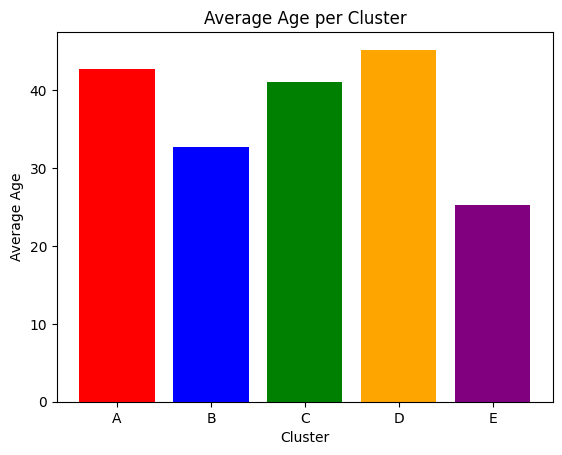

In [76]:
plt.bar(['A', 'B', 'C', 'D', 'E'], age_means, color = colors, label = 'Age')
plt.title("Average Age per Cluster")
plt.xlabel("Cluster")
plt.ylabel("Average Age")
plt.show()

We observe the low income high spenders are generally in their 30s, while the high income high spenders are generally middle aged people in their 40s

& No observable effects of transformation on clustering because the skewness was already negligible.

In [81]:
data.to_csv('transformed_data.csv')